<a href="https://colab.research.google.com/github/priya-200/Blog/blob/master/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting whether
or not someone has heart disease based on their medical attributes.

Tools used:

1. pandas for data analysis.
2. NumPy for numerical operations.
3. Matplotlib/seaborn for plotting or data visualization.
4. Scikit-Learn for machine learning modelling and evaluation.

#Problem

In the statement,
Given the clinical parameters of the patient we are told to predict the heart disease using machine learning

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [ ]:
#For Data analysis

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data science/heart disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Exploratory Data Analysis (EDA)

In [ ]:
print(f'The length of data set is {len(df)}, shape of data is {df.shape}')

The length of data set is 1025, shape of data is (1025, 14)


In [ ]:
#Missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.tail()

NameError: name 'df' is not defined

In [ ]:
df.target.value_counts()

#This indicate that this is the balanced classifcation problem as the group of
# classes are quit same i.e, the amount of data having disease is more or less
# equall to the no of patients not having heart diasese

1    526
0    499
Name: target, dtype: int64

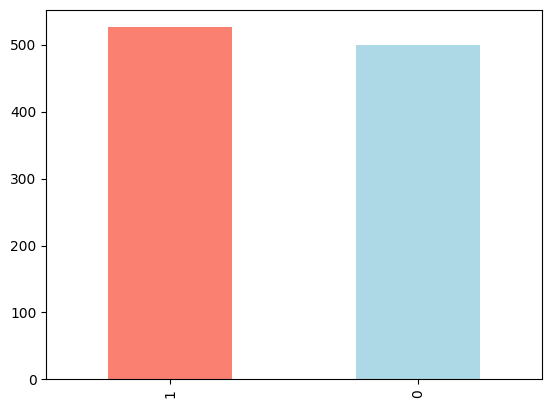

In [ ]:
df.target.value_counts().plot(kind = 'bar',color=['salmon','lightblue']);

In [ ]:
#Are there any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Compare different columns to gain insights (compare the feature to the target variable)

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
#Compare target with sex(1st Parameter)

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


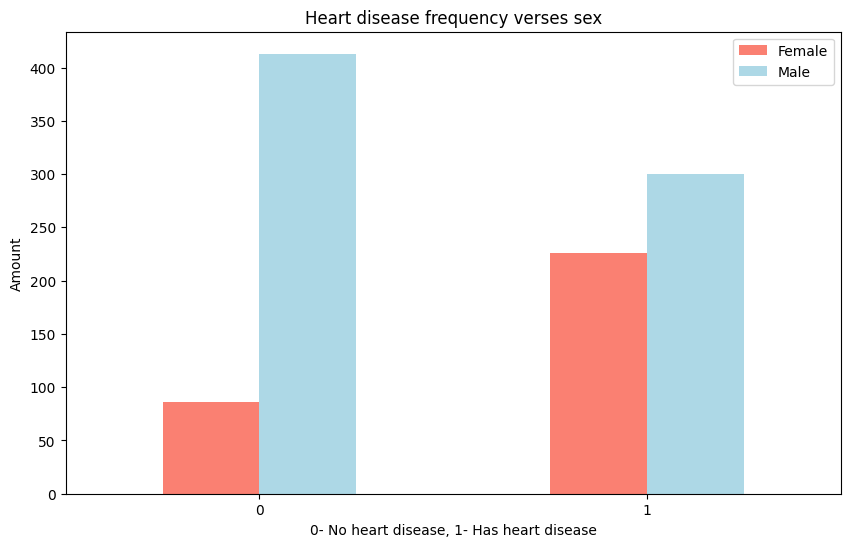

In [ ]:
#Create a plot

pd.crosstab(df.target,df.sex).plot(kind= 'bar',figsize =(10,6),color=['salmon','lightblue'])
plt.title("Heart disease frequency verses sex")
plt.xlabel("0- No heart disease, 1- Has heart disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

We use scatter graph instead of bar graph for thalach because as we can see in
thalach there are 91 different values in thalach because of which ploting the bar graph or other type of graph will be difficult.
so we use scatter graph for large number of plots
#Age verses maximum heart rate

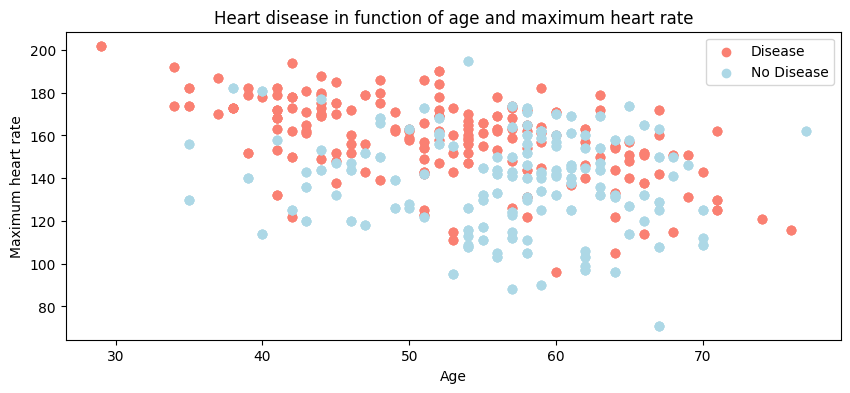

In [ ]:
#creating aa figure
plt.figure(figsize = (10,4))

#Scatter positive example (That is the person with heart disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.title("Heart disease in function of age and maximum heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(['Disease','No Disease'])

Distribution is other word for spread.This is used when we need to find the range and the number of example in that range.
* this is to find the out layers because if there are outlayers or extream layers in our dataset it maynot be useful
* If there are weird output in our model this maybe because of this out layers so this is very important to eliminate these data

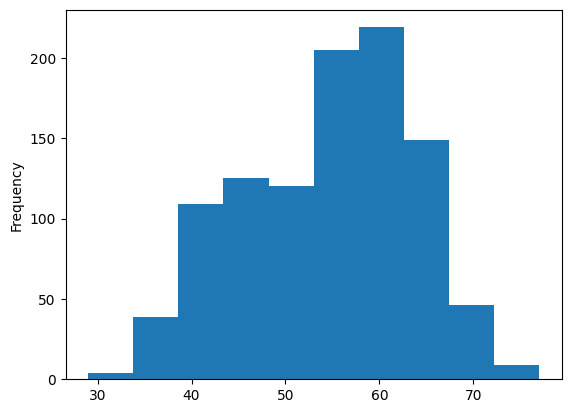

In [ ]:
#Age distribution

df.age.plot.hist();

#Heart disease frequecy vs. Heart disease
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


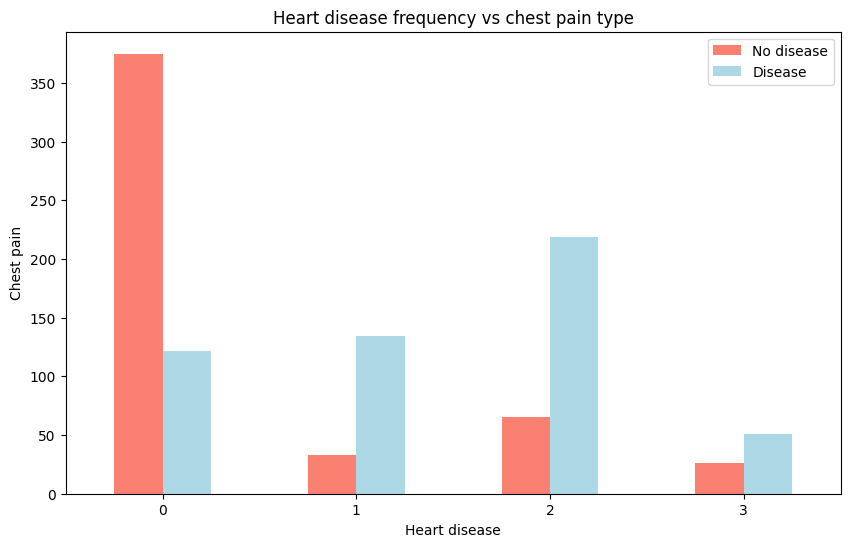

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title("Heart disease frequency vs chest pain type")
plt.xlabel("Heart disease")
plt.ylabel("Chest pain")
plt.xticks(rotation=0)
plt.legend(['No disease','Disease'])

#Corealation matrix:
Its a big tabel of numbers telling us how indepent varables are related to one another
* If the value of the heat map is positive then it indicates that both the features are directly propotional to one another
* If the value of heat map is negative of less then it indicate that both the features are inversly propotional.

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


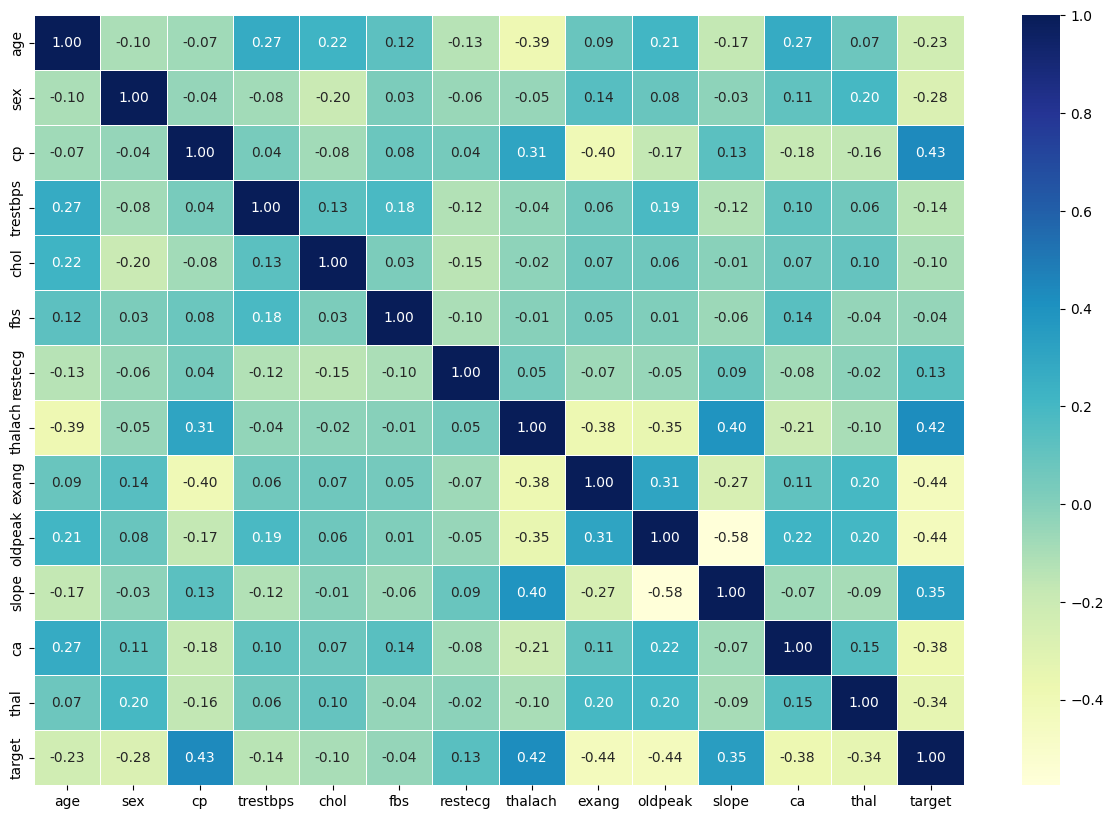

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap='YlGnBu')

In [ ]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,225,455
1,274,71


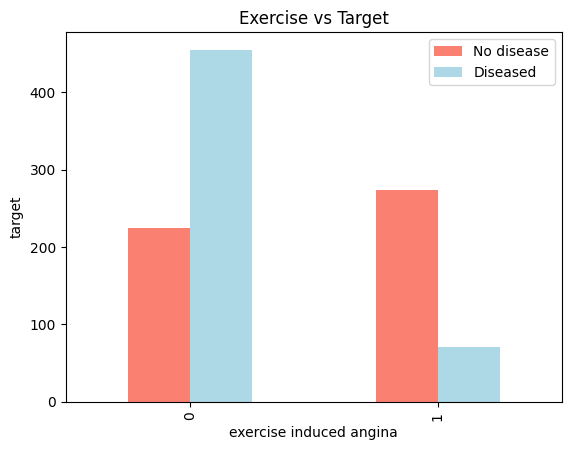

In [ ]:
pd.crosstab(df.exang,df.target).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('exercise induced angina')
plt.ylabel('target')
plt.title("Exercise vs Target")
plt.legend(['No disease','Diseased']);

#Machine Learning

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Splitng the dataframe
X = df.drop('target',axis = 1)
y = df.target

In [ ]:
# Splitting into traing and test set

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train),len(X_test)

(820, 205)

# What model should we use??

As we know machine learing is iterative process in machine learning part we should tryout different models
here we are going to use
1. 'SDG Classification'
2. 'KNN Classification'
3. 'Random Forest Classification'
4. 'Logistic Regression'
5. 'Kernal approcimation'

In [ ]:
# Import statements

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Put Models in dict

models = {"SGDClassifier":SGDClassifier(),
          "KNN":KNeighborsClassifier(),
          "Random Forest Classification":RandomForestClassifier(),
          "Logistic regression":LogisticRegression()
          }

scores = {}

def model_fit_and_score(models, X_train ,X_test,y_train, y_test):
  np.random.seed(42)
  for name, model in models.items():
    model.fit(X_train,y_train)
    scores[name] = model.score(X_test,y_test)
  return scores

In [ ]:
model_scores = model_fit_and_score(models = models,
                                   X_train = X_train,
                                   X_test = X_test,
                                   y_train = y_train,
                                   y_test = y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'SGDClassifier': 0.5560975609756098,
 'KNN': 0.7317073170731707,
 'Random Forest Classification': 0.9853658536585366,
 'Logistic regression': 0.7853658536585366}

# Model Comparision

<Axes: >

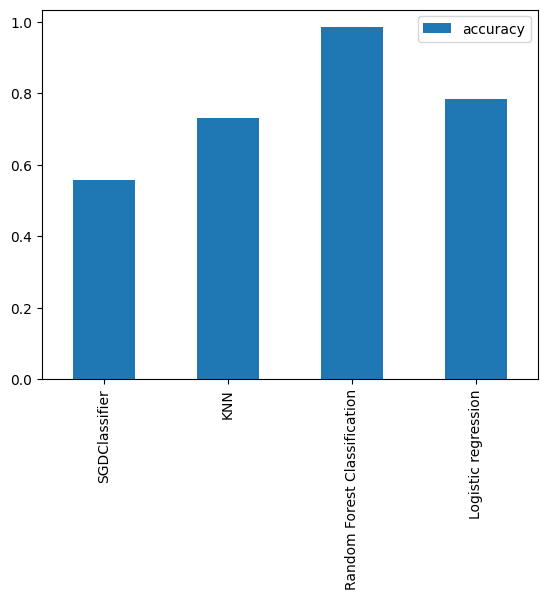

In [ ]:
model_comparison = pd.DataFrame(model_scores,index = ['accuracy'])
model_comparison.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

1. Hypyterparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. lassification report
9. ROC curve
10. Area under the curve (AUC)

# HyperParameter Tuning

In [ ]:
# KNN Model

train_score = {}
test_score = {}

knn = KNeighborsClassifier()

# create a list of different n_neigbhors

n_neighbors = np.arange(2, 30, 1)
for neighbors in n_neighbors:
  knn.set_params(n_neighbors= neighbors)
  knn.fit(X_train,y_train)
  train_score[str(neighbors)] = knn.score(X_train,y_train)
  test_score[str(neighbors)] = knn.score(X_test,y_test)

In [ ]:
train_score , test_score

({'2': 0.9963414634146341,
  '3': 0.9914634146341463,
  '4': 0.947560975609756,
  '5': 0.9231707317073171,
  '6': 0.8207317073170731,
  '7': 0.7914634146341464,
  '8': 0.7926829268292683,
  '9': 0.7670731707317073,
  '10': 0.7853658536585366,
  '11': 0.775609756097561,
  '12': 0.7695121951219512,
  '13': 0.7609756097560976,
  '14': 0.7817073170731708,
  '15': 0.7670731707317073,
  '16': 0.7670731707317073,
  '17': 0.75,
  '18': 0.7597560975609756,
  '19': 0.7634146341463415,
  '20': 0.7682926829268293,
  '21': 0.7597560975609756,
  '22': 0.7451219512195122,
  '23': 0.7317073170731707,
  '24': 0.7280487804878049,
  '25': 0.7378048780487805,
  '26': 0.7365853658536585,
  '27': 0.7426829268292683,
  '28': 0.7353658536585366,
  '29': 0.7475609756097561},
 {'2': 0.9560975609756097,
  '3': 0.9024390243902439,
  '4': 0.8097560975609757,
  '5': 0.7317073170731707,
  '6': 0.6878048780487804,
  '7': 0.6780487804878049,
  '8': 0.6682926829268293,
  '9': 0.7170731707317073,
  '10': 0.7170731707317

Maximum KNN score on test dataset is 95.61


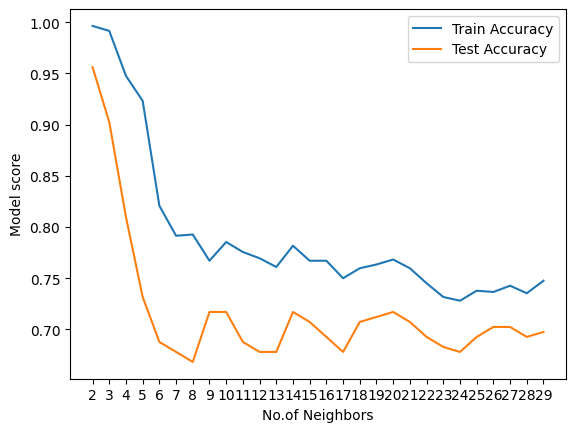

In [ ]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xticks(np.arange(2,30,1))
plt.xlabel("No.of Neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on test dataset is {max(test_score.values())*100 :.2f}")

#Hyperparameter tuning by Randomize search CV
>
1. Logistic regresion
2. RandomForest regression



In [ ]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}
rf_grid = {
   "n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = log_reg_grid,
    cv = 5,
    n_iter = 20,
    verbose = True
)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

#RandomForest Tuning

In [ ]:
np.random.seed(42)

rf_rcv = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = rf_grid,
    cv = 5,
    n_iter = 20,
    verbose= True
)
rf_rcv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
rf_rcv.best_params_

In [ ]:
rf_rcv.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid2 = {
   "n_estimators": np.arange(500, 700, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 5),
    "min_samples_leaf": np.arange(1, 20, 5)
}

rf_gscv = GridSearchCV(
    RandomForestClassifier(),
    param_grid= rf_grid2,
    cv = 5,
    verbose = True
)

rf_gscv.fit(X_train,y_train)

#Best Parameters!!!!

In [ ]:
rf_gscv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf_gscv.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid2 = {
   "n_estimators": np.arange(500, 700, 80),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [5,10,15],
    "min_samples_leaf": [5,10,15,20]
}

rf_gscv = GridSearchCV(
    RandomForestClassifier(),
    param_grid= rf_grid2,
    cv = 5,
    verbose = True
)

rf_gscv.fit(X_train,y_train)

In [ ]:
rf_gscv.best_params_

In [ ]:
rf_gscv.score(X_test,y_test)

#Estimators of gridSearchCSV

In [ ]:
y_preds = rf_gscv.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
from sklearn.metrics import (
    plot_roc_curve,
    classification_report,
    confusion_matrix,
    precision_score,
    f1_score,
    recall_score
)


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
##Best model

best_model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
best_model.fit(X_train,y_train)
best_model.score(X_test,y_test)

0.9853658536585366

##Evaluating

In [ ]:
y_preds = best_model.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

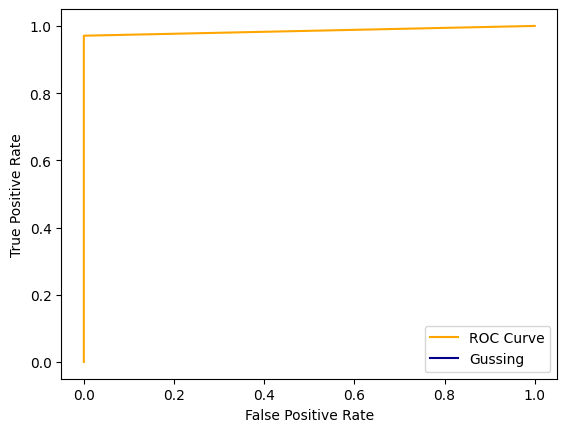

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds  = (roc_curve(y_test,y_preds))
plt.plot(fpr,tpr,color='orange',label='ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend();

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrixs = confusion_matrix(y_test,y_preds)

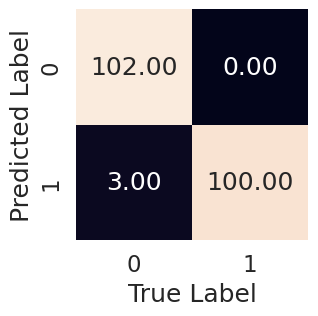

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)

fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrixs,
                 fmt='.2f',
                 annot=True,
                 cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



##Cross_validation scores

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(best_model,
                         X,y,
                         cv=5,
                         scoring='accuracy')
print(f"Average of cross validation accuracy {np.mean(cv_acc)}")

Average of cross validation accuracy 0.9941463414634146


In [ ]:
cv_prec = cross_val_score(best_model,
                           X,y,
                           cv=5,
                           scoring='precision')
print(f"Average of cross validation precision {np.mean(cv_prec)}")

Average of cross validation precision 0.9944954128440366


In [ ]:
cv_recall = cross_val_score(best_model,
                           X,y,
                           cv=5,
                           scoring='recall')
print(f"Average of cross validation recall {np.mean(cv_recall)}")

Average of cross validation recall 1.0


In [ ]:
cv_f1_score = cross_val_score(best_model,
                              X,y,
                              cv=5,
                              scoring='f1')
print(f"Average of cross validation f1-score {np.mean(cv_f1_score)}")

Average of cross validation f1-score 0.9943924009171307


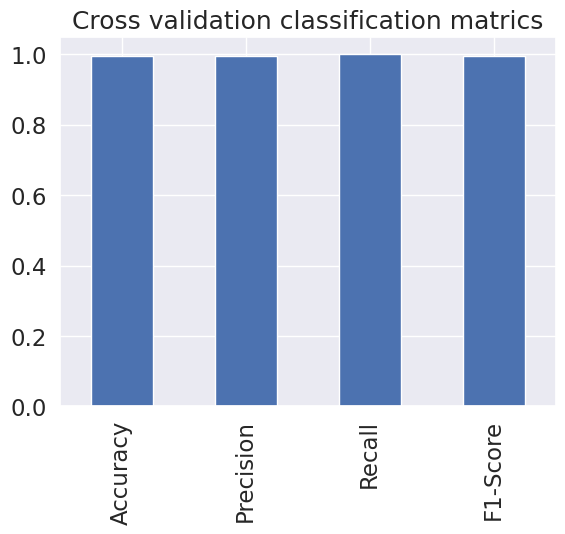

In [ ]:
cv_matrix = pd.DataFrame({"Accuracy":np.mean(cv_acc),
                          "Precision":np.mean(cv_prec),
                          "Recall":np.mean(cv_recall),
                          "F1-Score":np.mean(cv_f1_score)},index=[0])
cv_matrix.T.plot(kind="bar",title='Cross validation classification matrics',legend=False);

#Feature Importances

In [ ]:
(best_model.feature_importances_)

array([0.08368768, 0.02997668, 0.12942403, 0.06942493, 0.07937099,
       0.00861389, 0.01792833, 0.12095193, 0.05045219, 0.11819652,
       0.04445675, 0.12537327, 0.12214281])

In [ ]:
(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance bar graph')

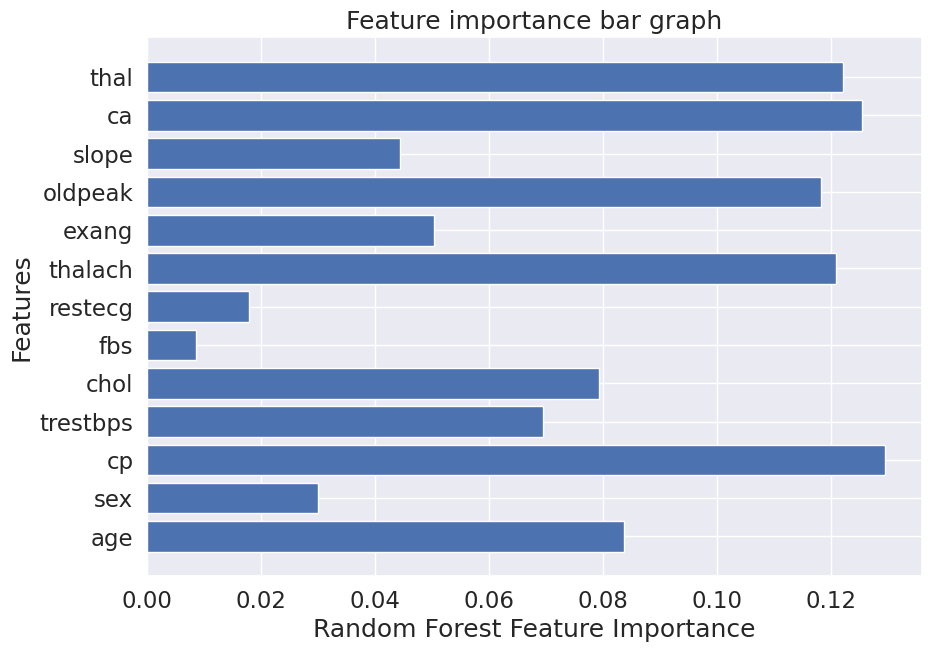

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
ax = plt.barh(df.columns[:13],best_model.feature_importances_)
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature importance bar graph")